In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
import requests
import pandas as pd
import numpy as np

In [2]:
ticker = "TSLA"
api_key = "ec2d6f3b0cc9395fbce02f1316669229"
years = 10

In [3]:
url = (f"https://financialmodelingprep.com/api/v3/income-statement/{ticker}?limit={years}&apikey={api_key}")
r = requests.get(url)
income_statement = r.json()

print(income_statement)

[{'date': '2022-12-31', 'symbol': 'TSLA', 'reportedCurrency': 'USD', 'cik': '0001318605', 'fillingDate': '2023-01-31', 'acceptedDate': '2023-01-30 21:29:15', 'calendarYear': '2022', 'period': 'FY', 'revenue': 81462000000, 'costOfRevenue': 60609000000, 'grossProfit': 20853000000, 'grossProfitRatio': 0.2559843854, 'researchAndDevelopmentExpenses': 3075000000, 'generalAndAdministrativeExpenses': 0, 'sellingAndMarketingExpenses': 0, 'sellingGeneralAndAdministrativeExpenses': 3946000000, 'otherExpenses': -43000000, 'operatingExpenses': 7021000000, 'costAndExpenses': 67630000000, 'interestIncome': 297000000, 'interestExpense': 191000000, 'depreciationAndAmortization': 4177000000, 'ebitda': 17833000000, 'ebitdaratio': 0.2189118853, 'operatingIncome': 13656000000, 'operatingIncomeRatio': 0.167636444, 'totalOtherIncomeExpensesNet': 63000000, 'incomeBeforeTax': 13719000000, 'incomeBeforeTaxRatio': 0.1684098107, 'incomeTaxExpense': 1132000000, 'netIncome': 12583000000, 'netIncomeRatio': 0.1544646

In [4]:
df_income_statement = pd.DataFrame(income_statement)
print(df_income_statement)


         date symbol reportedCurrency         cik fillingDate  \
0  2022-12-31   TSLA              USD  0001318605  2023-01-31   
1  2021-12-31   TSLA              USD  0001318605  2022-02-07   
2  2020-12-31   TSLA              USD  0001318605  2021-02-08   
3  2019-12-31   TSLA              USD  0001318605  2020-02-13   
4  2018-12-31   TSLA              USD  0001318605  2019-02-19   

          acceptedDate calendarYear period      revenue  costOfRevenue  ...  \
0  2023-01-30 21:29:15         2022     FY  81462000000    60609000000  ...   
1  2022-02-04 20:11:27         2021     FY  53823000000    40217000000  ...   
2  2021-02-08 07:27:23         2020     FY  31536000000    24906000000  ...   
3  2020-02-13 07:12:18         2019     FY  24578000000    20509000000  ...   
4  2019-02-19 06:10:16         2018     FY  21461268000    17419247000  ...   

   incomeBeforeTaxRatio  incomeTaxExpense    netIncome  netIncomeRatio   eps  \
0              0.168410        1132000000  12583000000

In [5]:
df_income_statement.head()

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
0,2022-12-31,TSLA,USD,0001318605,2023-01-31,2023-01-30 21:29:15,2022,FY,81462000000,60609000000,...,0.168410,1132000000,12583000000,0.154465,4.02,3.62,3130000000,3475000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
1,2021-12-31,TSLA,USD,0001318605,2022-02-07,2022-02-04 20:11:27,2021,FY,53823000000,40217000000,...,0.117849,699000000,5519000000,0.102540,1.87,1.63,2958000000,3387000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2,2020-12-31,TSLA,USD,0001318605,2021-02-08,2021-02-08 07:27:23,2020,FY,31536000000,24906000000,...,0.036593,292000000,690000000,0.021880,0.25,0.21,2799000000,3249000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
3,2019-12-31,TSLA,USD,0001318605,2020-02-13,2020-02-13 07:12:18,2019,FY,24578000000,20509000000,...,-0.027057,110000000,-775000000,-0.031532,-0.29,-0.29,2661000000,2661000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
4,2018-12-31,TSLA,USD,0001318605,2019-02-19,2019-02-19 06:10:16,2018,FY,21461268000,17419247000,...,-0.046817,57837000,-976091000,-0.045482,-0.38,-0.38,2559000000,2559000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...


In [6]:
df_income_statement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   date                                     5 non-null      object 
 1   symbol                                   5 non-null      object 
 2   reportedCurrency                         5 non-null      object 
 3   cik                                      5 non-null      object 
 4   fillingDate                              5 non-null      object 
 5   acceptedDate                             5 non-null      object 
 6   calendarYear                             5 non-null      object 
 7   period                                   5 non-null      object 
 8   revenue                                  5 non-null      int64  
 9   costOfRevenue                            5 non-null      int64  
 10  grossProfit                              5 non-null   

In [7]:
#Gross Profit Margin - it reveals the ability of an organization to earn a reasonable return on its offerings
def format_float(gpm):
    return f'{gpm:,.2f}'
gpm = df_income_statement[['grossProfit', 'revenue']].applymap(format_float)
print(gpm)

gross_profit_margin = df_income_statement['grossProfit'][0] / df_income_statement['revenue'][0]
print(f'Gross Profit Margin: {gross_profit_margin:.2f}')

if gross_profit_margin > 0.10:
    print('Current profit margin indicates a healthy financial performance')
elif gross_profit_margin < 0.10:
    print('Understand why is the Gross profit Margin Low')

         grossProfit            revenue
0  20,853,000,000.00  81,462,000,000.00
1  13,606,000,000.00  53,823,000,000.00
2   6,630,000,000.00  31,536,000,000.00
3   4,069,000,000.00  24,578,000,000.00
4   4,042,021,000.00  21,461,268,000.00
Gross Profit Margin: 0.26
Current profit margin indicates a healthy financial performance


/var/folders/07/hp5ltwgs395flys9xp50kcqh0000gn/T/ipykernel_1284/2583458648.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


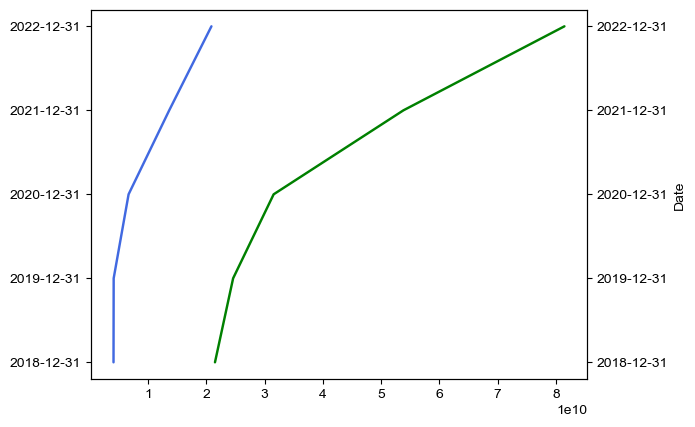

In [8]:
df = df_income_statement.sort_index(ascending = False)
df[['date', 'grossProfit', 'revenue']].head()

fig, ax = plt.subplots()
ax2 = ax.twinx()

plt.style.use('seaborn')
plt.xlabel('Gross Profit and Revenue')
plt.ylabel('Date')
ax.plot(df['grossProfit'], df['date'], color = "royalblue")
ax2.plot(df['revenue'], df['date'], color = 'g')


plt.show()


In [9]:
#Net Profit Margin - This is the Ultimate analysis item -  can a business earn a profit when all deductions are considered
def format_float(npm):
    return f'{npm:,.2f}'
npm = df_income_statement[['netIncome', 'revenue']].applymap(format_float)
print(npm)
net_profit_margin = df_income_statement['netIncome'][0] / df_income_statement['revenue'][0]

print(f'Net Profit Margin {net_profit_margin:.2f}')
if net_profit_margin > 0.10:
    print('Current net profit margin indicates a healthy financial performance')
elif net_profit_margin < 0.10:
    print('raises concerns about profitability from your revenue streams')

           netIncome            revenue
0  12,583,000,000.00  81,462,000,000.00
1   5,519,000,000.00  53,823,000,000.00
2     690,000,000.00  31,536,000,000.00
3    -775,000,000.00  24,578,000,000.00
4    -976,091,000.00  21,461,268,000.00
Net Profit Margin 0.15
Current net profit margin indicates a healthy financial performance


In [10]:
#Interest Coverage Ratio
def format_float(icr):
    return f'{icr:,.2f}'
icr = df_income_statement[['operatingIncome', 'interestExpense']].applymap(format_float)
print(icr)

int_coverage_ratio = df_income_statement['operatingIncome'][0] / df_income_statement['interestExpense'][0]
print(f'{int_coverage_ratio:.2f}')

     operatingIncome interestExpense
0  13,656,000,000.00  191,000,000.00
1   6,687,000,000.00  371,000,000.00
2   1,994,000,000.00  748,000,000.00
3     169,000,000.00  685,000,000.00
4    -388,073,000.00  663,071,000.00
71.50


# Operating Margin
It reveals the amount that a business has earned before financing other costs are considered.

In [11]:
def format_float(om):
    return f'{om:,.2f}'
om = df_income_statement[["operatingIncome", 'revenue']].applymap(format_float)
print(om)

operating_margin = df_income_statement['operatingIncome'][0] / df_income_statement['revenue'][0]

print(f'Operating Margin: {operating_margin:.2f}')
if operating_margin > 0.10:
    print(f'With an Operating Margin of {operating_margin:.2f}, {ticker} demonstrates efficient cost management in generating profits from operations.')
else:
    print('The Operating Margin is below 10%, indicating a challenging profitability situation at the operational level.')

     operatingIncome            revenue
0  13,656,000,000.00  81,462,000,000.00
1   6,687,000,000.00  53,823,000,000.00
2   1,994,000,000.00  31,536,000,000.00
3     169,000,000.00  24,578,000,000.00
4    -388,073,000.00  21,461,268,000.00
Operating Margin: 0.17
With an Operating Margin of 0.17, TSLA demonstrates efficient cost management in generating profits from operations.
